# Biodiversité des parcs nationaux américains

# Introduction

L'objectif de ce projet est d'étudier la biodiversité au sein de parcs nationaux. Pour cela nous utiliserons des données pour plusieurs espèces observées dans différents lieux. Les données sont produites par le National Parks Service.

En science des données vous devrez préparer les données, les analyser (statistiquement) et produire des figures pertinentes dans l'objectif de répondre à différentes questions.

**Sources:**

Les fichiers `Observations.csv` et `Species_info.csv` ont été récupérés sur [Kaggle](https://www.kaggle.com/code/karthikbhandary2/biodiversity-analysis/notebook).

Remarques: Les données pour ce projet sont inventées bien qu'*inspirées* par des données réelles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Objectifs du projet

Vous êtes une ou un analyste de la biodiversité pour le Service des parcs nationaux. Le National Park Service veut assurer la survie des espèces en péril et maintenir le niveau de biodiversité au sein de leurs parcs. Par conséquent, vos principaux objectifs seront de comprendre les caractéristiques des espèces et leur état de conservation, ainsi que ces espèces et leurs relations avec les parcs nationaux. Quelques questions qui se posent :

- Quelle est la répartition des statuts de conservation des espèces ?
- Certains types d'espèces sont-ils plus susceptibles d'être menacés ?
- Les différences entre les espèces et leur statut de conservation sont-elles significatives ?
- Quel animal est le plus répandu et quelle est sa répartition dans les parcs ?

### Chargement des données

Ce TP contient deux ensembles de données. Le premier fichier `csv` (*comma separated values*) contient des informations sur chaque espèce et un autre contient des observations d'espèces avec des emplacements de parc. Ces données seront utilisées pour analyser répondre aux questions ci-dessus.

### Analyse des données

Des statistiques descriptives et des techniques de visualisation des données seront utilisées pour mieux comprendre les données. L'inférence statistique sera également utilisée pour tester si les valeurs observées sont statistiquement significatives. Certaines des mesures clés qui seront calculées incluent :

1. Distributions
1. comptage
1. relation entre les espèces
1. état de conservation des espèces
1. observations d'espèces dans les parcs.

### Évaluation/Conclusion

Enfin, nous reviendrons aux questions posées. A-t-on pu répondre à toutes les questions? Peut-on aller plus loin ? Nous réfléchirons aux limites/verrons si l'une des analyses aurait pu être effectuée à l'aide de méthodes différentes.


# Chargement des données

Téléchargez les fichiers `observations.csv` et `species_info.csv` sur e-campus et mettez-les sur votre jupyter. 

Chargez les fichiers sous forme de tables (`dataframes`) appelées `species` et `observations` pour `species_info.csv` et `observations.csv` respectivement.

La fonction `.head()` permet d'avoir un apercu du contenu de chaque table.

In [2]:
species= pd.read_csv('species_info.csv') 
species.head()


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
observations = pd.read_csv('observations.csv')
observations.head()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Caractéristiques des jeux de données

Quelles sont les dimensions des jeux de données ? *Répondez en écrivant une phrase complète et en explicitant le nombre de lignes et de colonnes. N'hésitez pas à ajouter des cellules dans ce notebook.*

In [4]:
species.shape

(5824, 4)

In [5]:
observations.shape

(23296, 3)

<span style="color:green">
    

    
    

<span style="color:green">
 
Il y 5824 lignes et 4 colonnes pour species
et 23296 et 3 colonnes pour observation

Il est temps d'explorer un peu plus en profondeur la table `species`. Répondez aux questions suivantes :

- Combien y a-t-il d'espèces différentes ? Ce nombre est-il égal aux nombre de lignes ? Pourquoi ?

In [6]:
# n'oubliez pas de mettre le code et de rédiger vos réponses. 
# Ajoutez des cellules de code ou de markdown à l'aide de la barre d'outils au dessus du notebook

In [7]:
species['scientific_name'].value_counts()

Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64

<span style="color:green">
Nombre d'espece differente:  5541    

<span style="color:green">

il y a des doublons dans scientific name, c'est ce qui explique que le nombre d'espèce n'est pas égal au nombre de ligne.
    

- Combien y a-t-il de catégories différentes ? A quoi cette colonne correspond-t-elle?

In [8]:
name_category = species['category']
number_category_unique = len(name_category.unique())
print ( "Nombre de catégorie: ", number_category_unique)

print(name_category.unique())

Nombre de catégorie:  7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


<span style="color:green">
 
La colonne category correspond aux classes d'animaux   

- Combien y a-t-il d'espèces dans chaque catégorie ? Quelle catégorie a le plus (respectivement le moins) d'espèces ? Est-ce surprenant ? Faites une figure pour représenter ce jeu de données

*Remarque : Les Vascular Plant correspondent aux [Trachéophytes](https://fr.wikipedia.org/wiki/Tracheophyta) et regroupent les plantes à fleurs [Angiospermes](https://fr.wikipedia.org/wiki/Angiosperme). Les Nonvascular plant correspondent aux [plantes non-vasculaires](https://fr.wikipedia.org/wiki/Plante_non_vasculaire)*

In [9]:
species['category'].value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

<span style="color:green">
    
La catégorie avec le plus d'espèce sont les  Vascular plante et la catégorie avec le moins d'espèce sont les réptiles.
Cela n'est pas surprenant car il y a plus de plantes que d'animaux    

Text(0, 0.5, "Nombre d'espece")

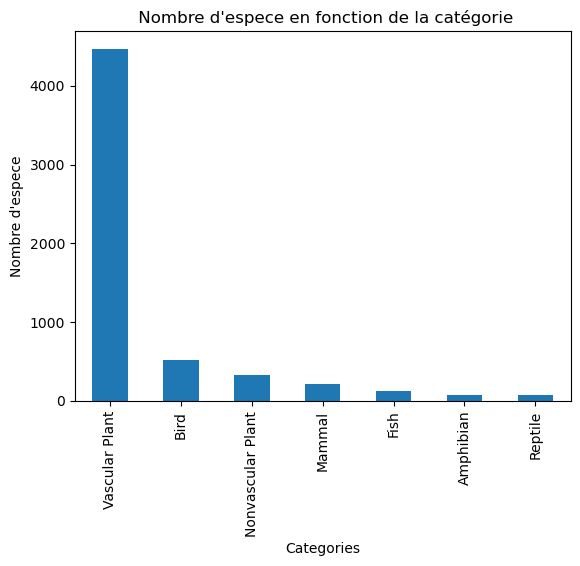

In [10]:
ax = species['category'].value_counts().plot.bar(title = " Nombre d'espece en fonction de la catégorie")

ax.set_xlabel("Categories")
ax.set_ylabel("Nombre d'espece")


- Quels sont les statuts possibles de ces espèces ? Pouvez-vous les trier du moins au plus problématique pour notre problématique de conservation de la biodiversité (faites une recherche internet)?

In [11]:
species['conservation_status'].unique() 

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

<span style="color:green">
Les status possibles de ces espèces (trier du moins au plus problématique) sont : Threatened, In Recovery, Species of Concern, Endangered.

- Ensuite, effectuez un décompte du nombre d'observations dans la répartition des catégories dans `conservation_status`. A votre avis, que signifie une valeur `nan` ? Faites une figure pour représenter ces données.

La colonne `conservation_status` a plusieurs valeurs possibles:
- `Species of Concern`: "Espèces préoccupantes", en déclin ou qui semblent avoir besoin d'être conservées
- `Threatened`: "Menacées" : vulnérable à une mise en danger dans un avenir proche
- `Endangered`: "En danger" : gravement menacées d'extinction
- `In Recovery`: "En rétablissement" : anciennement "Endangered", mais actuellement plus en danger d'extinction dans l'ensemble ou dans une part importante de son aire de répartition

In [12]:
species['conservation_status'].value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

Text(0, 0.5, "Nombre d'espece")

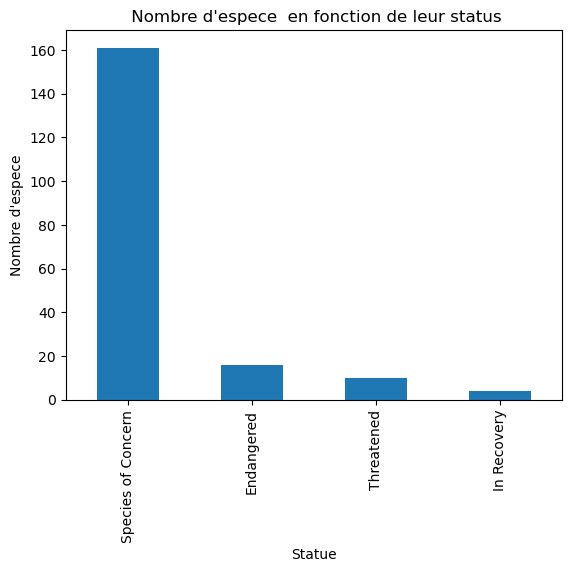

In [13]:
a1 = species['conservation_status'].value_counts().plot.bar(title = " Nombre d'espece  en fonction de leur status")

a1.set_xlabel("Statue")
a1.set_ylabel("Nombre d'espece")

<span style="color:green">
Les status possibles de ces espèces sont :  nan, Species of Concern, Endangered, Threatened, In Recovery .
   
    
A mon avis nan signifie qu'il n'y a pas de spécification de conservation.

#### Jeu de données `observations`

On passe à l'observation de l'autre table, `observations`.

- Combien de parcs sont étudiés ? Ou se situent-ils (faites une recherche internet) ?

In [14]:
name_park = observations['park_name']
number_park_unique = len(name_park.unique())
print ( "Nombre de parc étudiés : ", number_park_unique)

print(name_park.unique())

Nombre de parc étudiés :  4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


<span style="color:green">
Les quatres parc se situe aux États-Unis dans les états suivants:
    Great Smoky Mountains National Park(Tennessee) 
    ,Yosemite National Park (Californie) 
    ,Bryce National Park (Utah) 
    ,Yellowstone National Park (Wyoming)

- Quelle est l'espèce la plus observée (et qu'est-ce que c'est ?) ? 

In [15]:
obs10 = observations.drop(['park_name'], axis=1)
obs10

,scientific_name,observations
0,Vicia benghalensis,68
1,Neovison vison,77
2,Prunus subcordata,138
3,Abutilon theophrasti,84
4,Githopsis specularioides,85
...,...,...
23291,Croton monanthogynus,173
23292,Otospermophilus beecheyi,130
23293,Heterotheca sessiliflora ssp. echioides,140
23294,Dicranella rufescens,171


In [16]:
obs12 = obs10.groupby(['scientific_name']).sum()
obs12

,observations
scientific_name,
Abies bifolia,532
Abies concolor,630
Abies fraseri,518
Abietinella abietina,592
Abronia ammophila,523
...,...
Zonotrichia leucophrys gambelii,560
Zonotrichia leucophrys oriantha,558
Zonotrichia querula,616


In [17]:
obs12.idxmax()

observations    Streptopelia decaocto
dtype: object

<span style="color:green">
L'espèce la plus observé est le Streptopelia decaocto autrement dit la Tourterelle turque. C'est un oiseau


- Dans quel parc trouve-t-on le plus d'observations ?

In [18]:
obs = observations.drop(['scientific_name'], axis=1)


In [19]:
obs2 = obs.groupby(['park_name']).sum()

In [20]:
obs2

,observations
park_name,
Bryce National Park,576025
Great Smoky Mountains National Park,431820
Yellowstone National Park,1443562
Yosemite National Park,863332


In [21]:
obs2.max()

observations    1443562
dtype: int64

In [22]:
obs2.idxmax()

observations    Yellowstone National Park
dtype: object

<span style="color:green">

Le parc ou il y a le plus d'observations est Yellowstone Park

# Analyse des données

La première étape est de nettoyer et préparer les données 

- Dans la colonne `conservation_status` de la table `species`, remplacez les valeurs `nan` par `No Intervention`. En effet, `nan` signifie qu'il n'y a pas de spécification de conservation.

In [23]:
species = species.fillna('No Intervention')

- Explorez les différents statuts de conservation. Commencez par éliminer ceux sans intervention. Puis pour chaque statut, 1) comptez le nombre d'occurences des différentes `category` et 2) représentez le nombre d'espèces en fonction du statut (figure de type barplot stacked). Quel type d'être vivant est particulièrement en danger ? Commentez votre figure.

In [24]:
indexNoI = species[species['conservation_status'] == 'No Intervention' ].index
sp = species.drop(indexNoI)


In [25]:
sp.head(10)

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern


In [26]:
sp1 = sp.drop(['scientific_name','common_names'], axis=1)

In [27]:
sp1.groupby(['conservation_status','category']).value_counts()

conservation_status  category         
Endangered           Amphibian             1
                     Bird                  4
                     Fish                  3
                     Mammal                7
                     Vascular Plant        1
In Recovery          Bird                  3
                     Mammal                1
Species of Concern   Amphibian             4
                     Bird                 72
                     Fish                  4
                     Mammal               28
                     Nonvascular Plant     5
                     Reptile               5
                     Vascular Plant       43
Threatened           Amphibian             2
                     Fish                  4
                     Mammal                2
                     Vascular Plant        2
dtype: int64

In [28]:
sp1.describe()

,category,conservation_status
count,191,191
unique,7,4
top,Bird,Species of Concern
freq,79,161


Text(0, 0.5, "Nombre d'espece")

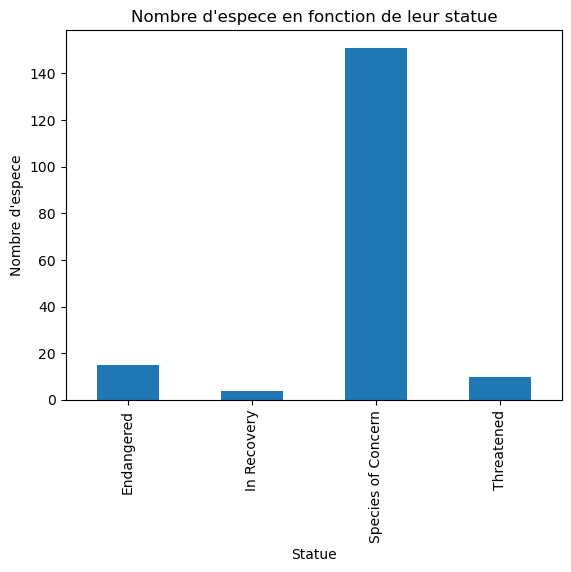

In [29]:
a3 = sp.groupby(['conservation_status'])['scientific_name'].nunique().plot.bar( title = "Nombre d'espece en fonction de leur statue" )

a3.set_xlabel("Statue")
a3.set_ylabel("Nombre d'espece")


<span style="color:green">
Le type d'epèces la plus en danger est le Bird

A l'aide des analyses précédentes, répondez à la question initiale en quelques phrases: *Quelle est la répartition des statuts de conservation des espèces ?*

<span style="color:green">
On peut voir que la majorité des animaux sont Species of Concern.
Parmi cela les oiseaux sont les nombreux et sont donc les plus en danger

#### Conservation

On passe maintenant à la deuxième question : quelles sont les espèces plus susceptibles d'être suivies dans le cadre de la conservation ? 

- Créez une nouvelle colonne `is_protected` qui vaut `False` pour toute espèces étant `No Intervention` et `True``sinon.

In [30]:
species['is_protected'] = np.where(species['conservation_status']=='No Intervention', 'False', 'True')

In [31]:
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


- Pour chaque `category` calculez la proportion d'espèces protégées. Observez les résultats.

In [32]:
sp3 = species.drop(['scientific_name','common_names','conservation_status'], axis = 1)

In [33]:
sp4 = sp3.groupby(['category']).describe()

In [34]:
sp4

is_protected                    
                         count unique    top  freq
category                                          
Amphibian                   80      2  False    73
Bird                       521      2  False   442
Fish                       127      2  False   116
Mammal                     214      2  False   176
Nonvascular Plant          333      2  False   328
Reptile                     79      2  False    74
Vascular Plant            4470      2  False  4424

In [35]:
sp4.columns


MultiIndex([('is_protected',  'count'),
            ('is_protected', 'unique'),
            ('is_protected',    'top'),
            ('is_protected',   'freq')],
           )

In [36]:
sp5 = sp4

In [37]:
sp5["proportion d'espece protegé"] = 1- sp5['is_protected','freq']/ sp5['is_protected','count']

In [38]:
sp5

is_protected                     proportion d'espece protegé
                         count unique    top  freq                            
category                                                                      
Amphibian                   80      2  False    73                      0.0875
Bird                       521      2  False   442                    0.151631
Fish                       127      2  False   116                    0.086614
Mammal                     214      2  False   176                     0.17757
Nonvascular Plant          333      2  False   328                    0.015015
Reptile                     79      2  False    74                    0.063291
Vascular Plant            4470      2  False  4424                    0.010291

<span style="color:green">
On peut voir que la proportion d'espèce protegé est tres faible

#### Tests statistiques

Afin de déterminer si les différences entre les catégories sont significatives ou pas, il faut faire des tests statistiques. Vous allez éxécuter un [test du chi-2](https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2) qui permet de voir si différentes catégories présentent des différences statistiquement significatives dans les taux de statut de conservation. Ce test, non paramétrique, se base sur une table de contingence et compare si la répartition est homogène entre les 2 catégories. Une telle table ressemble à cela:


||protected|not protected|
|-|-|-|
|Non-vascular plant|?|?|
|Vascular plant|?|?|

Commencons par tester si les deux catégories de plantes ont des taux de conservation similaires. La table de contingence est donnée ci-dessous `contingency1`

Le calcul du X2 retourne plusieurs valeurs. La deuxième valeur est la p-value, ici 0.69 et est à comparer à la p-value standard des test de significance 0.05 (5% de la queue de distribution). Pour un rappel en statistiques, revoir le cours d'Introduction à la Science des données de Mme Guyon (L1) ou de Mr Evrard (L2).

Ici, 0.69 > 0.05 donc les plantes vasculaires ou non semblent suivre la même répartition en terme de protection.

In [39]:
from scipy.stats import chi2_contingency

#Table de contingence MPlantes non-vascaulaires versus vasculaires
contingency1 = [[5, 328],
              [46,4126]]
#Calcul du X2
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.15447053643010147, pvalue=0.694299244877863, dof=1, expected_freq=array([[3.76981132e+00, 3.29230189e+02],
       [4.72301887e+01, 4.12476981e+03]]))

Refaites la même analyse pour `Vascular Plant` et `Mammal`.

Commencez par la table de contingence puis faites le test en analyser les résultats.

||protected|not protected|
|-|-|-|
|Mammal|38|176|
|Vascular Plant|46|4424|



In [40]:
contingency10 = [[38, 176],
              [46,4424]]
chi2_contingency(contingency10)

Chi2ContingencyResult(statistic=315.04938977522016, pvalue=1.7349112437604003e-70, dof=1, expected_freq=array([[3.83774552e+00, 2.10162254e+02],
       [8.01622545e+01, 4.38983775e+03]]))

Répondez à la deuxième question du TP (en faisant d'autres analyses si nécessaire): *quelles sont les espèces plus susceptibles d'être suivies dans le cadre de la conservation ?*

<span style="color:green">
On voit que p est largement inferieur à 0,05 donc les plantes vasculaires et les mamifère semblent ne pas suivre la même répartition en terme de protection.

#### Espèces dans les parcs

La première étape consiste à examiner les noms communs(`common_names`) de `species` pour avoir une idée des animaux les plus répandus. 

Regardez les noms d'espèces:

In [41]:
print(species.common_names[:6])

0                             Gapper's Red-Backed Vole
1                                American Bison, Bison
2    Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3    Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                        Wapiti Or Elk
5                                    White-Tailed Deer
Name: common_names, dtype: object


Il y a des doublons. Commencons par nettoyer les données:

In [42]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#On supprime la ponctuation des noms
common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

On supprime les doublons pour chaque espèce (comme Aurochs en 3ème position):

In [43]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [44]:
#On fusionne tous les noms d'espèces
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

On peut maitenant comptez le nombre d'apparition d'un terme. Par exemple `Bat` (pour chauve-souris) apparait 23 fois.

In [45]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
3,Bat,23
56,Shrew,18
63,Myotis,17
157,Mouse,16
7,Chipmunk,13
172,Squirrel,12
165,American,12
106,Eastern,11
39,Vole,11
117,Western,10


- Crééz une nouvelle colonne `is_bat` qui vaut `True` si Bat est inclus dans le nom de l'espèce et `False` sinon.

In [46]:
species['is_bat'] = False
cond = species['common_names'].str.contains('Bat')
species.loc[cond,'is_bat'] = True


- Affichez les espèces de chauve-souris. Sont-elles toutes protégées? A quelle(s) catégorie(s) appartiennent-elles ?

In [47]:
sp20 = species[species["is_bat"] == True]
sp20

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [48]:
sp20.shape

(24, 6)

Fusionnez la table des chauves-souris avec celle des `observations`. 
- Combien y a-t-il de lignes ?

In [49]:
fus = observations.merge(sp20,how="inner",on="scientific_name")
fus.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True


In [50]:
fus.shape

(152, 8)

<span style="color:green">
il y a 152 lignes

- Combien de chauves-souris ont été observées pour chaque parc ? Sont-elles majoritairememt protégées ou pas ? Commentez.

In [51]:
fus.groupby(['park_name'])['observations'].sum()


park_name
Bryce National Park                    3625
Great Smoky Mountains National Park    2513
Yellowstone National Park              8901
Yosemite National Park                 5104
Name: observations, dtype: int64

In [52]:
fus.groupby(['scientific_name'])['is_protected'].describe()

,count,unique,top,freq
scientific_name,,,,
Antrozous pallidus,4,1,True,4
Centaurea cyanus,8,1,False,8
Corynorhinus rafinesquii,4,1,False,4
Corynorhinus townsendii,16,1,False,16
Eptesicus fuscus,16,1,True,16
Euderma maculatum,4,1,True,4
Eumops perotis,4,1,False,4
Lasionycteris noctivagans,16,1,True,16
Lasiurus blossevillii,4,1,True,4


<span style="color:green">
On voit qu'elle sont majoritairement pas proteger.

- Tracez le nombre d'observations entre les espèces de chauves-souris protégées ou non et ce pour chaque parc (faire un barplot). Quelle différence y a-t-il entre les parcs ?

Text(0, 0.5, "Nombre d'observations")

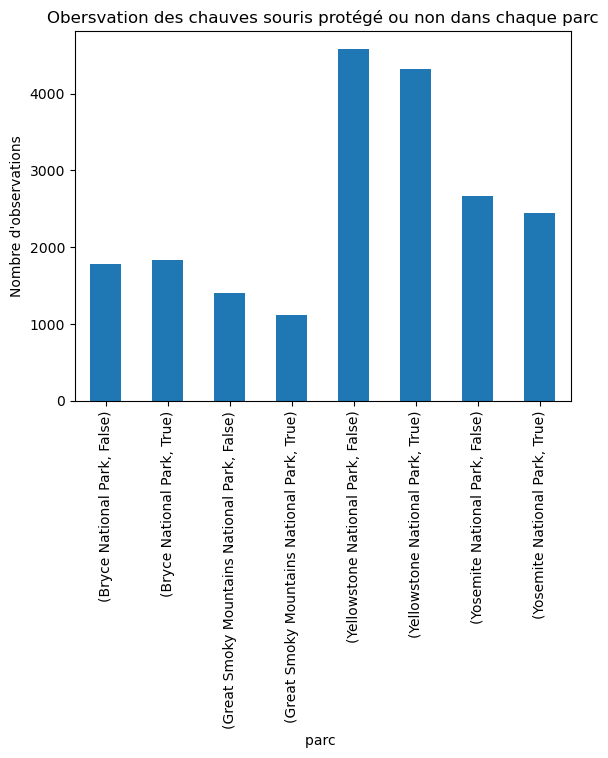

In [53]:
a4 = fus.groupby(['park_name','is_protected'])['observations'].sum().plot.bar(title="Obersvation des chauves souris protégé ou non dans chaque parc")

a4.set_xlabel("parc ")
a4.set_ylabel("Nombre d'observations")


<span style="color:green">
On voit une difference enorme avec Yellowstone et les autres parcs

# Evaluation/Conclusions

Ce TP a permis d'analyser la composition en être vivants de 4 parcs nationaux. N'hésitez pas à porposer d'autres analyses.
Répondez de facon succinte aux questions suivantes:


- Quelle est la répartition des statuts de conservation des espèces ?

- Certains types d'espèces sont-ils plus susceptibles d'être menacés ?

- Les différences entre les espèces et leur statut de conservation sont-elles significatives ?

- Quel animal est le plus répandu et quelle est sa répartition dans les parcs ?



<span style="color:green">
-On peut voir que la majorité des animaux sont Species of Concern.
-Le Bird est le type d'espèces le plus susceptibles d'être menacés.
-Oui elles sont significatives
-L'animal le plus répandue est la chauve souris

Nous avons travaillé sur des données fictionnelles. Dans le prochain mini-projet, nous analyserons des données réelles issues d'un papier scientifique.

Prenez un peu de recul. Selon vous, quelles sont les difficultés que nous rencontrerons à travailler sur des données réelles ? 

<span style="color:green">
On peut rencontrer des problemes avec une quantité énorme de donnnées.
Il de plus evité les doublons et que les données soit fiables